In [1]:
import cv2

In [2]:
import pytesseract

In [3]:
# !wget "https://cdn.pixabay.com/photo/2017/08/11/09/12/graffiti-2630080_1280.jpg"

In [4]:
def cv2_imshow(image):
    cv2.imshow("",image)
    k = cv2.waitKey(0) & 0xFF
    if(k==27):
        cv2.destroyAllWindows()

In [5]:
image = cv2.imread("graffiti-2630080_1280.jpg")

In [6]:
cv2_imshow(image)

In [7]:
import sklearn

In [8]:
from sklearn.datasets._samples_generator import make_blobs

In [9]:
x_data, y_data = make_blobs(n_samples=100,
          centers=2,
          cluster_std=5.1,
          random_state=30)

In [10]:
y_data

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [11]:
import numpy
X= x_data.astype(numpy.float32)
X

array([[ 2.2147558e+00, -6.9595490e+00],
       [ 5.2035184e+00, -4.3227682e+00],
       [-2.9715255e-01, -4.8713274e+00],
       [ 1.2783509e+00, -7.2593145e+00],
       [ 7.2788990e-01, -7.6978512e+00],
       [ 9.0908670e-01, -1.2214288e+01],
       [ 4.4263530e+00,  3.1333673e+00],
       [ 6.8911014e+00, -3.7035477e+00],
       [-6.3483882e+00, -4.8683763e+00],
       [ 1.4406197e+01, -1.0578820e+01],
       [ 8.2253851e-02, -4.8489332e+00],
       [ 3.0360124e+00, -4.6800699e+00],
       [ 7.9100871e-01, -7.7659144e+00],
       [ 1.1716012e+00, -3.7823439e+00],
       [ 4.5309529e+00, -7.4433856e+00],
       [ 7.9345355e+00, -5.4183230e+00],
       [ 2.9329526e+00, -4.1614661e+00],
       [-2.7278626e+00, -9.0948153e+00],
       [ 6.2952247e+00,  3.8525188e+00],
       [ 1.2009339e+00, -1.4740093e+00],
       [ 1.2567165e+01, -4.1947632e+00],
       [ 8.7224426e+00, -4.3158774e+00],
       [ 5.6917295e+00,  2.4821844e+00],
       [-7.4802208e-01, -7.9675293e+00],
       [ 2.85340

In [12]:
from sklearn.preprocessing import OneHotEncoder


In [13]:
encoder = OneHotEncoder(sparse=False, dtype=numpy.float32)

In [14]:
encoder

OneHotEncoder(dtype=<class 'numpy.float32'>, sparse=False)

In [15]:
y = encoder.fit_transform(y_data.reshape(-1,1))

In [16]:
y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [17]:
import cv2

In [18]:
model = cv2.ml.ANN_MLP_create()

In [51]:
import numpy

number_of_inputs = 2
number_of_hidden_layers =18
number_of_outputs = 2
model.setLayerSizes(numpy.array([number_of_inputs,
                                number_of_hidden_layers,
                                number_of_outputs]))

In [52]:
alpha = 2.5
beta = 1
model.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM,
                           alpha)

In [53]:
model.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)

In [54]:
termination_mode = cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS
maxiumum_iterations= 1000
minimum_accuracy = 0.001
model.setTermCriteria((termination_mode,
                      maxiumum_iterations,
                      minimum_accuracy))

In [55]:
model.train(X, cv2.ml.ROW_SAMPLE, y)

True

In [56]:
ret, prediction = model.predict(X)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(prediction.round(),y)

0.5

In [60]:
prediction

array([[-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,  1.4031053 ],
       [-0.40310526,

In [62]:
from matplotlib import pyplot

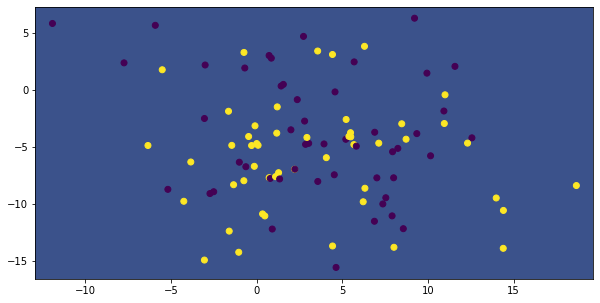

In [78]:
pyplot.rcParams["figure.figsize"] = (10,5)

def scatter(model, X, y):
     pyplot.scatter(X[:,0], X[:,1], c=y)
        

def visualize_results (model, X, y) :
   
    min_x, max_x = X[:,0].min() - 1, X[:, 0].max() + 1
    min_y, max_y = X[:,1].min() -1, X[:,1].max()+ 1
    h = 0.02
    
    new_x, new_y = numpy.meshgrid(numpy.arange(min_x, max_x, h),
                                  numpy.arange(min_y, max_y, h))
    
    x_hypothesis = numpy.c_[new_x.ravel().astype(numpy.float32),
                           new_y.ravel().astype(numpy.float32)]
    
    ret , z = model.predict(x_hypothesis)
    z = numpy.argmax(z, axis=1)
    z = z.reshape(new_x.shape)
                                  
                                  
    pyplot.contourf(new_x, new_y, z)

visualize_results(model, X, y_data) 
scatter(model, X, y_data) 
